In [1]:
import logging
import os
from PIL import Image
import six

from torch.utils.data import DataLoader

import lmdb
from tqdm.auto import tqdm

In [2]:
from cassava.lmdb_dataset import *
from cassava.utils import *
from cassava.transforms import get_test_transforms

In [3]:
unnorm = Unnormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [4]:
train_images_torch_2020 = context.catalog.load('train_images_torch_2020')

2020-12-23 21:31:26,081 - kedro.io.data_catalog - INFO - Loading data from `train_images_torch_2020` (ImageOneFolderDataSet)...


In [29]:
train_images_torch_2019 = context.catalog.load('train_images_torch_2019')

2020-12-23 21:35:43,878 - kedro.io.data_catalog - INFO - Loading data from `train_images_torch_2019` (ImageFolderDataSet)...


In [30]:
test_images_torch_2019 = context.catalog.load('test_images_torch_2019')
extra_images_torch_2019 = context.catalog.load('extra_images_torch_2019')

2020-12-23 21:35:43,956 - kedro.io.data_catalog - INFO - Loading data from `test_images_torch_2019` (ImageFolderDataSet)...
2020-12-23 21:35:43,986 - kedro.io.data_catalog - INFO - Loading data from `extra_images_torch_2019` (ImageFolderDataSet)...


(800, 600)


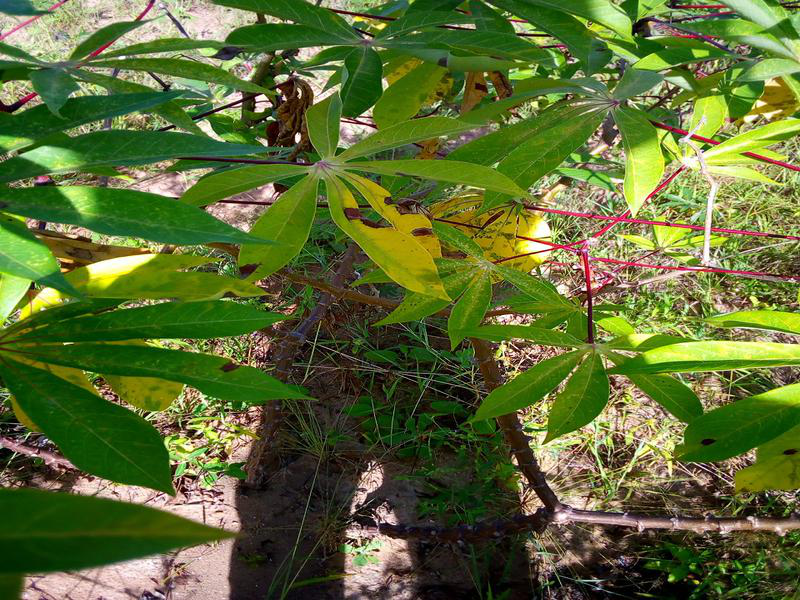

In [6]:
print(Image.fromarray(train_images_torch_2020[0][0]).size)
Image.fromarray(train_images_torch_2020[0][0])

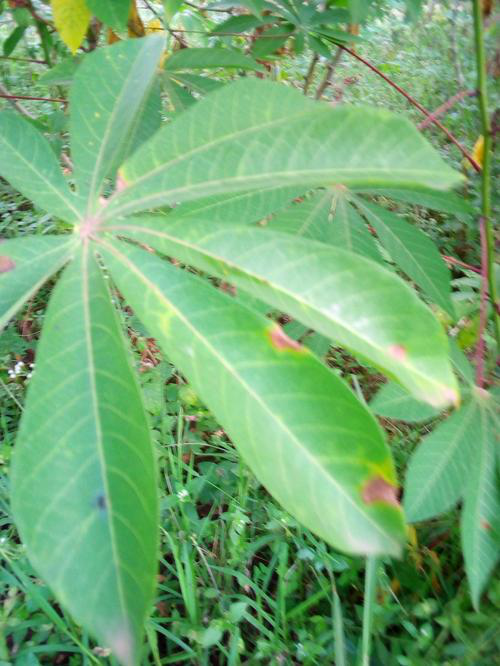

In [7]:
train_images_torch_2019[0][0]

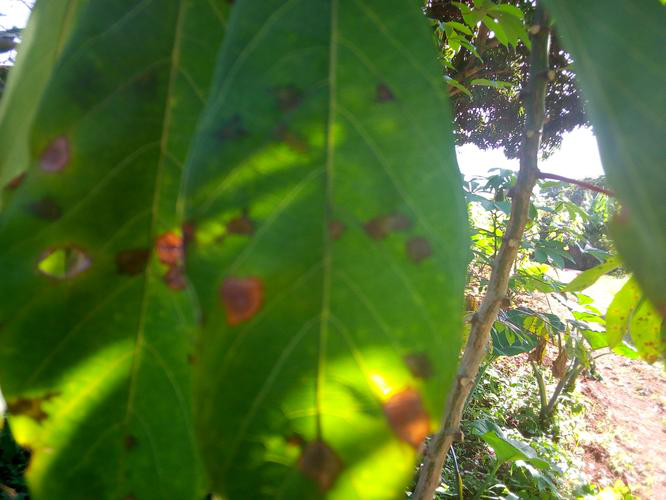

In [8]:
train_images_torch_2019[3][0]

In [21]:
def make_2019_like_2020(image):
    if image.size[0] < image.size[1]:
        image = image.rotate(90, expand=True)
    # Center crop until 8:6
    width, height = image.size   # Get dimensions
    new_height = int(height*(width/height * 6/8))
    print(new_height)
    new_width = width

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    image = image.crop((left, top, right, bottom))
    return image

(666, 500)
499


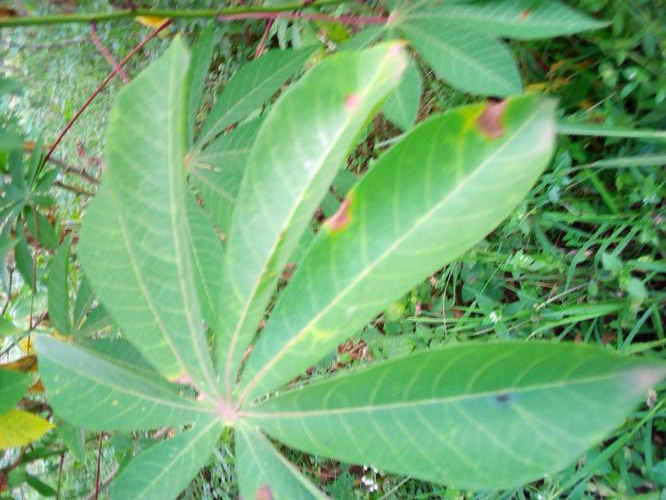

In [23]:
make_2019_like_2020(train_images_torch_2019[0][0])

(500, 499)
375


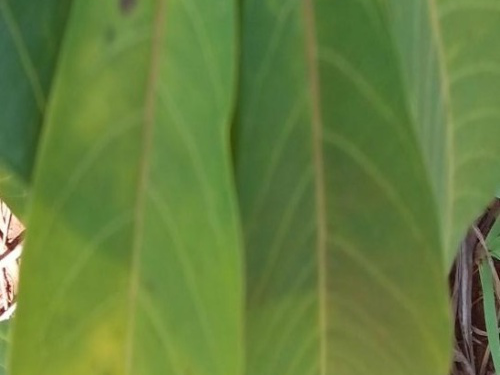

In [22]:
make_2019_like_2020(train_images_torch_2019[1][0])

(666, 500)
499


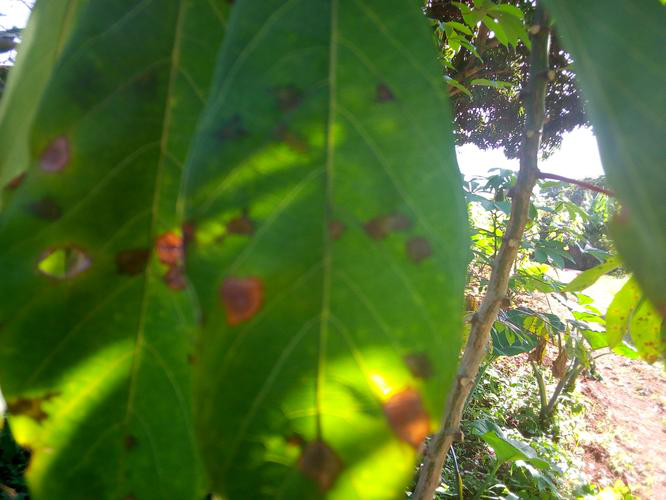

In [24]:
make_2019_like_2020(train_images_torch_2019[3][0])

(666, 500)
499


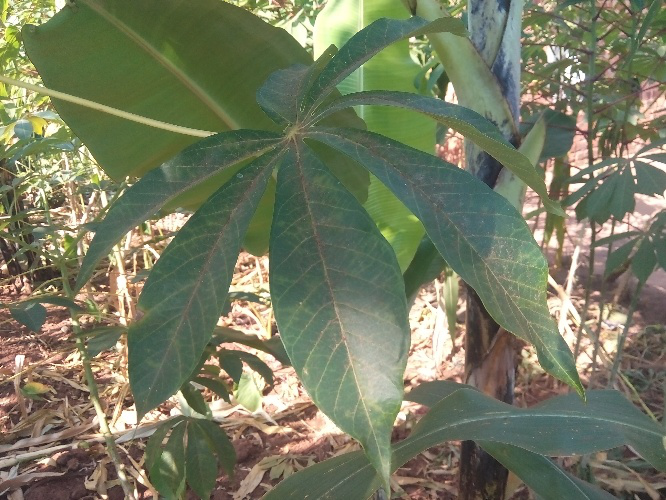

In [31]:
make_2019_like_2020(test_images_torch_2019[0][0])

(666, 500)
499


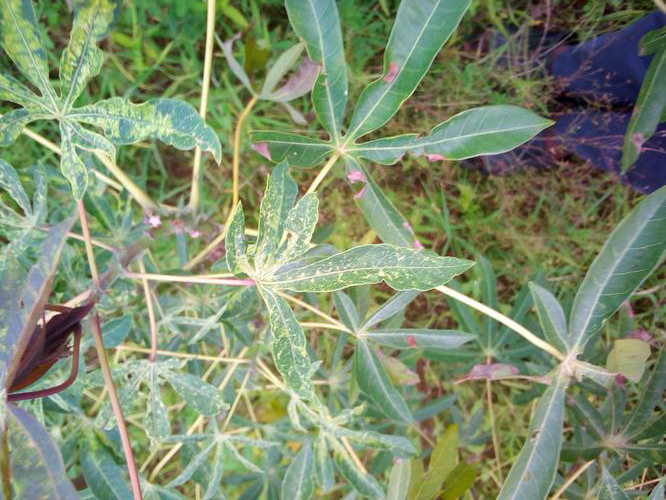

In [32]:
make_2019_like_2020(extra_images_torch_2019[0][0])